# Big Mart Sales Prediction

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

Importing operating system to see the directory of the file

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\arbaazkhan\\Downloads\\ana python\\Untitled Folder'

Loading train and test data by using pandas 

In [4]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

We have train (8523) and test (5681) data set, train data set has both input and output variable(s). We need to predict the sales for test data set.

Item_Identifier: Unique product ID

Item_Weight: Weight of product

Item_Fat_Content: Whether the product is low fat or not

Item_Visibility: The % of total display area of all products in a store allocated to the particular product

Item_Type: The category to which the product belongs

Item_MRP: Maximum Retail Price (list price) of the product

Outlet_Identifier: Unique store ID

Outlet_Establishment_Year: The year in which store was established

Outlet_Size: The size of the store in terms of ground area covered

Outlet_Location_Type: The type of city in which the store is located

Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

Looking head of the training data 

In [5]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
train_data.shape, test_data.shape

((8523, 12), (5681, 11))

In [7]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


concating the train and test data in one single data

In [8]:
train_data['source']='train'
test_data['source']='test'
test_data['Item_Outlet_Sales']=0
data=pd.concat([train_data,test_data],sort=False)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage

In [10]:
data['Item_Outlet_Sales'].describe()





count    14204.000000
mean      1308.865489
std       1699.791423
min          0.000000
25%          0.000000
50%        559.272000
75%       2163.184200
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

C:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

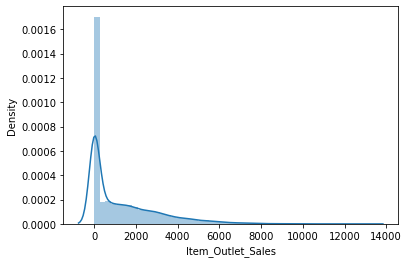

In [11]:
sns.distplot(data['Item_Outlet_Sales'])

so here we have positive skewness

In [12]:
print('skewness:%f'%data['Item_Outlet_Sales'].skew())
print('kurtosis:%f'%data['Item_Outlet_Sales'].kurt())

skewness:1.544684
kurtosis:2.419439


In [13]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

In [14]:

categorical_feature=data.select_dtypes(include=[np.object])
categorical_feature.head(5)

<ipython-input-14-15eb8488e88a>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_feature=data.select_dtypes(include=[np.object])


,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,train
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store,train
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,train


In [15]:
numerical_feature=data.select_dtypes(include=[np.number])
numerical_feature

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
5676,10.50,0.013496,141.3154,1997,0.0000
5677,7.60,0.142991,169.1448,2009,0.0000
5678,10.00,0.073529,118.7440,2002,0.0000
5679,15.30,0.000000,214.6218,2007,0.0000


In [16]:
data['Outlet_Establishment_Year'].unique()




array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

here we get the idea first establisment of store in 1985

In [17]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

In [18]:
data.nunique()

Item_Identifier               1559
Item_Weight                    415
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

In [19]:
#frequency of categorical columns
for col in categorical_feature:
    print('n%s column:'%col)
    print(data[col].value_counts())

nItem_Identifier column:
FDX31    10
FDH12    10
DRM11    10
FDZ50    10
FDS08    10
         ..
FDO33     7
FDL50     7
NCW54     7
FDX49     7
FDM50     7
Name: Item_Identifier, Length: 1559, dtype: int64
nItem_Fat_Content column:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
nItem_Type column:
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
nOutlet_Identifier column:
OUT027    1559
OUT013    1553
OUT049    1550
OUT035    1550
OUT046    1550
OUT045    1548
OUT0

there is an error LF,reg and low fat in item fat content we have to fix it by replace 

In [20]:
data['Item_Fat_Content'].replace(to_replace={'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'},inplace=True)

In [21]:
for col in categorical_feature:
    print('n%s column:'%col)
    print(data[col].value_counts())

nItem_Identifier column:
FDX31    10
FDH12    10
DRM11    10
FDZ50    10
FDS08    10
         ..
FDO33     7
FDL50     7
NCW54     7
FDX49     7
FDM50     7
Name: Item_Identifier, Length: 1559, dtype: int64
nItem_Fat_Content column:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64
nItem_Type column:
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
nOutlet_Identifier column:
OUT027    1559
OUT013    1553
OUT049    1550
OUT035    1550
OUT046    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019 

here we have filled item weight null value

now its turn to outlet size

In [22]:
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0],inplace=True)


In [23]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)

Here we are have categorical columns so we are filled null value by using mode function

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

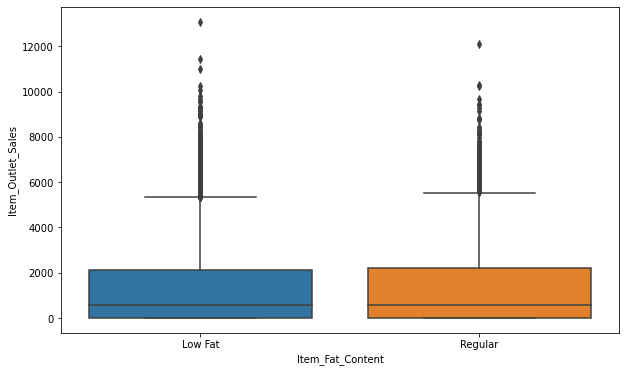

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=data)

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

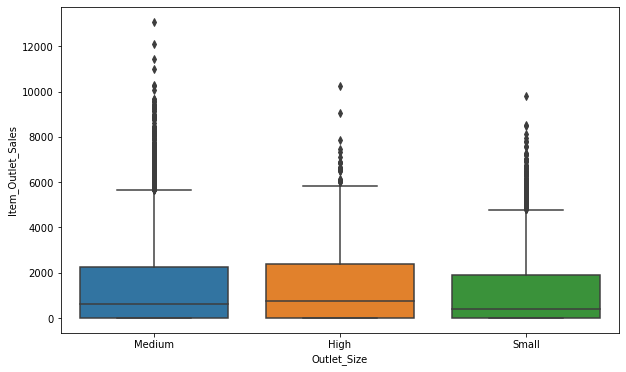

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=data)

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

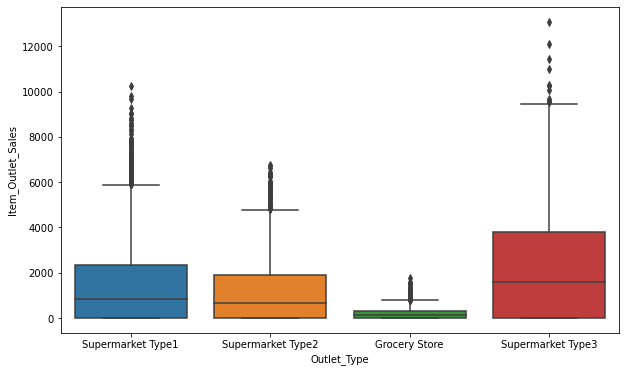

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',data=data)

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

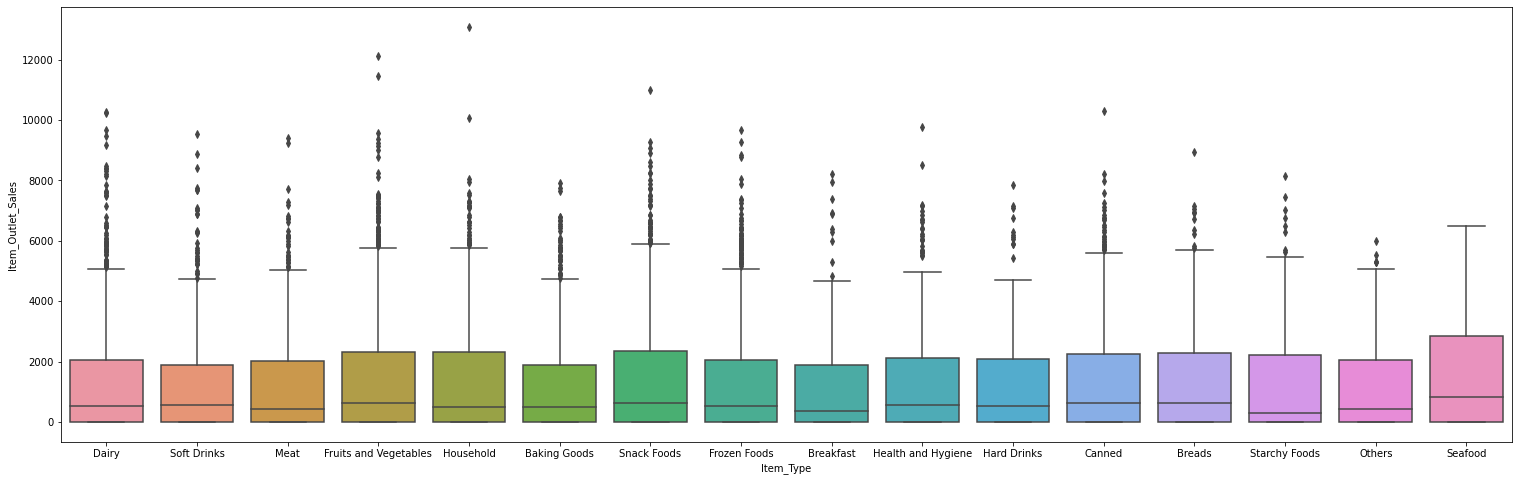

In [28]:
plt.figure(figsize=(26,8))
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',data=data)

<AxesSubplot:xlabel='Outlet_Establishment_Year'>

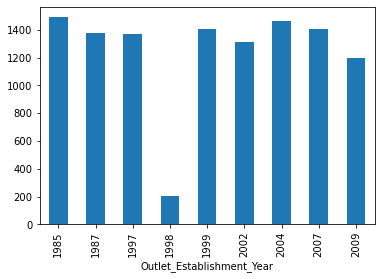

In [29]:
data.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot.bar()


In [30]:
temp_data=data.loc[data['Outlet_Establishment_Year']==1998]
temp_data['Outlet_Type'].value_counts()

Grocery Store    925
Name: Outlet_Type, dtype: int64


Based on the observation from 1998 data, we can see there is only Grocery Store Type as Outlet_Type thus Item_Outlet_Sale is minimum.

Thought to remove those data as part of data cleaning for more accurate model, however we need to check first it's posibilities in test data as well

In [31]:
temp_data=test_data.loc[test_data['Outlet_Establishment_Year']==1998]
temp_data['Outlet_Type'].value_counts()

Grocery Store    370
Name: Outlet_Type, dtype: int64

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['outlet']=le.fit_transform(data['Outlet_Identifier'])
var_mod=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size',
                                 'Outlet_Location_Type','Outlet_Type']
for i in var_mod:
    data[i]=le.fit_transform(data[i])

In [35]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,outlet
0,FDA15,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,train,9
1,DRC01,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,train,3
2,FDN15,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,train,9
3,FDX07,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800,train,0
4,NCD19,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052,train,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,1,0.013496,13,141.3154,8,1997,2,0,1,0.0000,test,8
5677,FDD47,7.60,1,0.142991,15,169.1448,3,2009,1,2,2,0.0000,test,3
5678,NCO17,10.00,0,0.073529,8,118.7440,7,2002,1,1,1,0.0000,test,7
5679,FDJ26,15.30,1,0.000000,3,214.6218,2,2007,1,1,1,0.0000,test,2


In [36]:
#droping the unnecessary columns
data.drop(['Item_Identifier','Outlet_Establishment_Year'],axis=1,inplace=True)

In [37]:
#dividing the data into train and test
train=data.loc[data['source']=='train']
test=data.loc[data['source']=='test']


In [38]:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

C:\anaconda\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [39]:
#exporting file to train and test
train.to_csv('train_modified.csv',index=False)
test.to_csv('test_modified.csv',index=False)

In [40]:
train_data=pd.read_csv('train_modified.csv')
test_data=pd.read_csv('test_modified.csv')

In [41]:
x=train_data.drop(['Item_Outlet_Sales'],axis=1)
y=train_data['Item_Outlet_Sales']

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [44]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [45]:
x_train_std=sc.fit_transform(x_train)

In [46]:
x_test_std=sc.transform(x_test)

In [47]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [48]:
lr.fit(x_train_std,y_train)

LinearRegression()

In [49]:
x_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,outlet
8179,11.00,0,0.055163,8,100.3358,3,1,2,2,3
8355,18.00,0,0.038979,13,148.6418,1,0,2,1,1
3411,7.72,1,0.074731,1,77.5986,8,2,0,1,8
7089,20.70,0,0.049035,6,39.9506,2,1,1,1,2
6954,7.55,0,0.027225,3,152.9340,7,1,1,1,7


In [50]:
y_pred=lr.predict(x_test_std)

In [51]:
y_test

8179     904.8222
8355    2795.6942
3411    1947.4650
7089     872.8638
6954    2450.1440
          ...    
1317    1721.0930
4996     914.8092
531      370.1848
3891    1358.2320
6629    2418.1856
Name: Item_Outlet_Sales, Length: 1705, dtype: float64

In [62]:
import joblib

In [63]:
joblib.dump(sc,r'C:\Users\arbaazkhan\Downloads\ana python\Untitled Folder\venv\models\sc.sav')

['C:\\Users\\arbaazkhan\\Downloads\\ana python\\Untitled Folder\\venv\\models\\sc.sav']

In [55]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [56]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.5075674885875066
878.8738376422509
1158.4723575827545


In [57]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=1000)

In [58]:
rf.fit(x_train_std,y_train)

RandomForestRegressor(n_estimators=1000)

In [59]:
y_pred=rf.predict(x_test_std)
y_pred

array([1675.9797236, 3416.8636286, 1303.6210866, ...,  402.5180454,
       1654.2719804, 2273.5212418])

In [60]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.5483218972758434
781.4291595432256
1109.4987944369338


In [61]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

#define model and paramter
model=RandomForestRegressor()
n_estimators=[10,100,1000]
max_depth=range(1,33)
min_sample_leaf=np.linspace(0.1,1.0)
max_features=['auto','sqrt','log2']
min_sample_split=[0.1,1.0,10]

#define grid search cv
grid=dict(n_estimators=n_estimators)
cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=80)
grid_search_forest=GridSearchCV(estimator=model,param_grid=grid,n_jobs=-1,
                               scoring='r2',error_score=0,verbose=2,cv=3)
grid_search_forest.fit(x_train_std,y_train)

#summarize the result
print(f"best:{grid_search_forest.best_score_:.3f} using{grid_search_forest.best_params_}")
means=grid_search_forest.cv_results_['mean_test_score']
stds=grid_search_forest.cv_results_['std_test_score']
params=grid_search_forest.cv_results_['params']

for mean,stdev,param in zip(means,stds,params):
    print(f"{mean:.3f}) ({stdev:.3f}) with:{params}")


Fitting 3 folds for each of 3 candidates, totalling 9 fits
best:0.560 using{'n_estimators': 1000}
0.519) (0.007) with:[{'n_estimators': 10}, {'n_estimators': 100}, {'n_estimators': 1000}]
0.558) (0.006) with:[{'n_estimators': 10}, {'n_estimators': 100}, {'n_estimators': 1000}]
0.560) (0.005) with:[{'n_estimators': 10}, {'n_estimators': 100}, {'n_estimators': 1000}]


In [64]:
import joblib

In [65]:
joblib.dump(grid_search_forest,r'C:\Users\arbaazkhan\Downloads\ana python\Untitled Folder\venv\models\rsf.sav')

['C:\\Users\\arbaazkhan\\Downloads\\ana python\\Untitled Folder\\venv\\models\\rsf.sav']